In [1]:
from utilities import *
import matlab.engine 
eng = matlab.engine.connect_matlab()


In [3]:
xs, prior_vals = compute_prior_pdf(r = 0.2, eta= 1.6, n_samples = 10000)

<ipython-input-2-370b0a293a76>:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]


Text(0.5, 1.0, '')

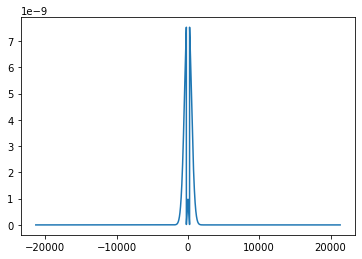

In [4]:
plt.plot(xs, prior_vals)
plt.title("")

In [5]:
xs, prior_vals_bad = compute_prior_pdf(r = 0.2, eta= 1.4, n_samples = 10000, n_tail = 0)


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:50: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]


Text(0.5, 1.0, '')

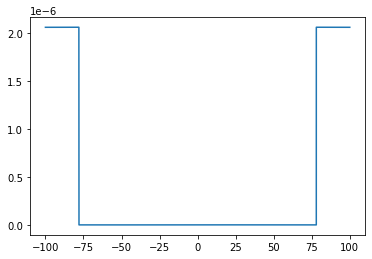

In [5]:
idx = np.logical_and(xs > - 200, xs < 200)
plt.plot(xs[idx], prior_vals_bad[idx])
plt.title("")


In [2]:
def compute_prior_pdf(r, eta, n_samples = 10000, tail_bound = 0.05, n_tail = 5, scale = 1):

    '''
    Returns support and pdf for prior distribution
    r : shape parameter controlling rate of exponentional decay
    eta : controls roundedness of peak, and hence sparsity
    scale : scale parameter
    n_samples : number of points used to numerically approximate CDF
    tail_bound : Uses Chebyshev's Inequality to bound the region of the CDF that is outside the coverage of xs
    n_tail : Sets the number of points tha lie outside the coverage of xs to approximate tails if need be

    Usage:
    new_pdf = compute_prior_cdf(r = 0.1, eta = 0.001)
    new_pdf(0.5343) returns CDF
    Can also accept arrays
    '''
    
    beta = (eta + 1.5)/r 
    var_prior = scale * scipy.special.gamma((eta + 1.5 + 1/2)/r)/scipy.special.gamma(beta)
    x_max = min(np.inf, np.round(var_prior/tail_bound)) # introduced additional bound in case chebyshev is unwieldy
    xs = np.linspace(-x_max, x_max, n_samples-2*n_tail)
    xs = np.append(np.linspace(-(x_max+100), -(x_max+20), n_tail), xs)
    xs = np.append(xs, np.linspace(x_max + 20, x_max + 100, n_tail))
    prior_pdf = np.full(xs.shape, np.nan)

    # Loop over xs
    for j, x in enumerate(xs):

        # Define integrands
        def gauss_density(theta):
            return (1./(np.sqrt(2*np.pi)*theta)) * np.exp(-0.5*(x/theta)**2)

        def gen_gamma_density(theta):
            return (r/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)

        def integrand(theta):
            return gauss_density(theta) * gen_gamma_density(theta)

        # Integrate 
        prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]
    return xs, prior_pdf

In [8]:
x = 5
r = 0.2
eta = 1.6
beta = (eta + 1.5)/r 
scale = 1
def gauss_density(theta):
            return (1./(np.sqrt(2*np.pi)*theta)) * np.exp(-0.5*(x/theta)**2)

def gen_gamma_density(theta):
    return (r/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)

def integrand(theta):
    return gauss_density(theta) * gen_gamma_density(theta)

# Integrate 
scipy.integrate.quad(integrand, 0, np.inf, limit = 5000)[0]

<ipython-input-8-1379078ede91>:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  scipy.integrate.quad(integrand, 0, np.inf, limit = 5000)[0]


9.74072050272561e-10

In [33]:
def test(x):
    return
eng.integral(integrand, 0, 2)

TypeError: unsupported Python data type: function

In [29]:
x = lambda a : a + 10
x(2)

12

Text(0.5, 1.0, '')

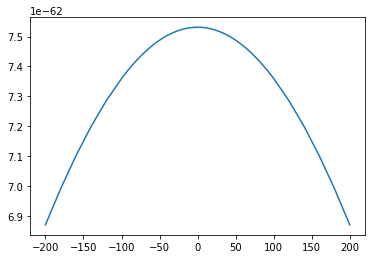

In [94]:
xs, prior_vals = compute_prior_pdf(r = 0.1, eta= 4, n_samples = 10000)
plt.plot(xs, prior_vals)
plt.title("")


In [5]:
def compute_prior_cdf(r, eta, n_samples = 1000, tail_bound = 0.05, n_tail = 5, scale = 1):

    '''
    Returns PPoly-type function that approximates the prior CDF of the signal x
    r : shape parameter controlling rate of exponentional decay
    eta : controls roundedness of peak, and hence sparsity
    scale : scale parameter
    n_samples : number of points used to numerically approximate CDF
    tail_bound : Uses Chebyshev's Inequality to bound the region of the CDF that is outside the coverage of xs
    n_tail : Sets the number of points tha lie outside the coverage of xs to approximate tails if need be

    Usage:
    new_cdf = compute_prior_cdf(r = 0.1, eta = 0.001)
    new_cdf(0.5343) returns CDF
    Can also accept arrays
    '''
    
    beta = (eta + 1.5)/r 
    var_prior = scale * scipy.special.gamma((eta + 1.5 + 1/2)/r)/scipy.special.gamma(beta)
    x_max = min(np.inf, np.round(var_prior/tail_bound)) # introduced additional bound in case chebyshev is unwieldy
    xs = np.linspace(-x_max, x_max, n_samples-2*n_tail)
    xs = np.append(np.linspace(-(x_max+100), -(x_max+20), n_tail), xs)
    xs = np.append(xs, np.linspace(x_max + 20, x_max + 100, n_tail))
    prior_pdf = np.full(xs.shape, np.nan)

    # Loop over xs
    for j, x in enumerate(xs):

        # Define integrands
        def gauss_density(theta):
            return (1./(np.sqrt(2*np.pi)*theta)) * np.exp(-0.5*(x/theta)**2)

        def gen_gamma_density(theta):
            return (r/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)

        def integrand(theta):
            return gauss_density(theta) * gen_gamma_density(theta)

        # Integrate 
        prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]

    prior_cdf = np.zeros_like(prior_pdf)
    for i in range(len(xs) - 1):
        prior_cdf[i] = np.trapz(prior_pdf[:i+1], xs[:i+1]) 
    prior_cdf = np.append(prior_cdf[:-1], 1)

    poly = interpolate.CubicSpline(x = xs, y = prior_cdf)
    return poly

In [6]:
F_prior_vals_bad = compute_prior_cdf(r = 0.2, eta= 1.6, n_samples = 10000)

<ipython-input-5-be04f6c233dc>:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]


Text(0.5, 1.0, '')

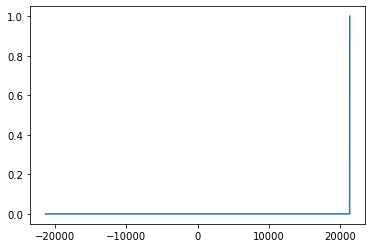

In [7]:
plt.plot(xs, F_prior_vals_bad(xs))
plt.title("")

In [21]:
scale = 1
r = 0.2
eta= 1.6
beta = (eta + 1.5)/r 
var_prior = scale * scipy.special.gamma((eta + 1.5 + 1/2)/r)/scipy.special.gamma(beta)
var_prior

1062.265275292824

In [63]:
for i in np.arange(0.1, 0.3, 0.01):
    xs, prior = compute_prior_pdf(r = i, eta= 1.4, n_samples = 1000)
    print(i, ": ", np.sum(prior <= 0))

0.1 :  0
0.11 :  0
0.12 :  0
0.13 :  0
0.13999999999999999 :  0
0.14999999999999997 :  0
0.15999999999999998 :  0
0.16999999999999998 :  0
0.17999999999999997 :  0
0.18999999999999995 :  0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/testing-framework/utilities.py:50: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]


0.19999999999999996 :  4
0.20999999999999996 :  0
0.21999999999999995 :  0
0.22999999999999995 :  0
0.23999999999999994 :  0
0.24999999999999992 :  0
0.2599999999999999 :  0
0.2699999999999999 :  0
0.2799999999999999 :  0
0.2899999999999999 :  0
